# Chapter 9: Fine-Tuning and Training AI Model

## 1. Work with datasets

In [2]:
# Chapter 9 Fine-Tuning and Training AI Model
from datasets import load_dataset
dataset = load_dataset("dair-ai/emotion")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
dataset['train'][4]

{'text': 'i am feeling grouchy', 'label': 3}

In [4]:
dataset['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [5]:
df = dataset['train'].to_pandas()
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [6]:
label_names = dataset['train'].features['label'].names
label_names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [7]:
df['label_text'] = df['label'].apply(lambda x: label_names[x])
df['label_text']

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
15995    sadness
15996    sadness
15997        joy
15998      anger
15999    sadness
Name: label_text, Length: 16000, dtype: object

In [8]:
import matplotlib.pyplot as plt
label_counts = df['label_text'].value_counts(ascending=True)
label_counts

label_text
surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: count, dtype: int64

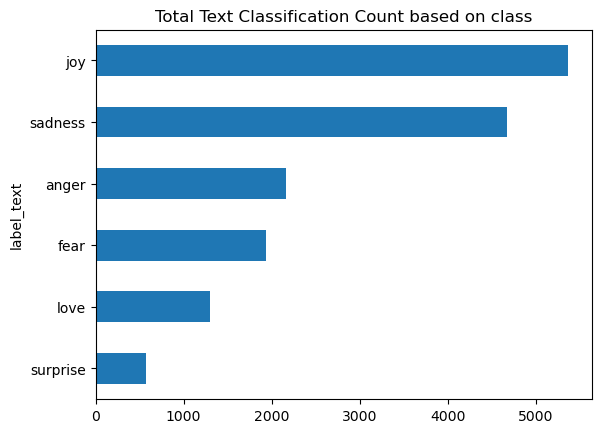

In [9]:
label_counts.plot.barh()
plt.title('Total Text Classification Count based on class')
plt.show()

## 2. Tokenizing data from Raw string



In [10]:
from transformers import AutoTokenizer
model_checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

text = "I love ML"
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 1045, 2293, 19875, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

## 3. Spliting dataset into Training, Validation, Testing

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['label_text'])

test, validation = train_test_split(test, test_size=1/3, stratify=test['label'])

train.shape, test.shape, validation.shape, df.shape

((11200, 3), (3200, 3), (1600, 3), (16000, 3))

In [12]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    'train': Dataset.from_pandas(train),
    'test': Dataset.from_pandas(test),
    'validation': Dataset.from_pandas(validation),
})
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 1600
    })
})

## 4. Tokenize all text in dataset using Map function of Huggingface

In [13]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

tokenize(dataset['train'][:3])
dataset['train'][:4]

{'text': ['i feel useless because i dont bring in any income',
  'i feel a sense of loss when an extremely talented and passionate engineer who wants to work on certain dsp design eventually takes up a job at a financial number crunching software company only because he did not get the right kind of job',
  'im just feeling that dating is an important part of growing up',
  'i feel so worthless during those times i was struggling finding work'],
 'label': [0, 1, 1, 0],
 'label_text': ['sadness', 'joy', 'joy', 'sadness'],
 '__index_level_0__': [11262, 3941, 3427, 88]}

In [14]:
encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [15]:
encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [21]:
encoded['train'][0]

{'text': 'i feel useless because i dont bring in any income',
 'label': 0,
 'label_text': 'sadness',
 '__index_level_0__': 11262,
 'input_ids': [101,
  1045,
  2514,
  11809,
  2138,
  1045,
  2123,
  2102,
  3288,
  1999,
  2151,
  3318,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


## 5. Working with Models

In [16]:
from transformers import AutoModel
model = AutoModel.from_pretrained(model_checkpoint)

model

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [17]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [19]:
model.config.id2label, model.config.label2id

({0: 'LABEL_0', 1: 'LABEL_1'}, {'LABEL_0': 0, 'LABEL_1': 1})

In [20]:
label2id = {label: i for i, label in enumerate(label_names)}
id2label = {i: label for i, label in enumerate(label_names)}
label2id, id2label

({'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5},
 {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'})

In [ ]:
# AutoModelForSequenceClassification loads the exact same pre-trained base model as AutoModel, but it automatically attaches a Sequence Classification Head on top of it.
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
import torch

config = AutoConfig.from_pretrained(model_checkpoint, label2id=label2id, id2label=id2label)
config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.51.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [28]:
if torch.backends.mps.is_built():
    device = torch.device('mps')
elif torch.cuda.is_available:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, config=config).to(device)
model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

## 6. Model Training

1. Training Argument
2. Build the trainer along with the arguments
3. Start training

Evaluate the model = compute metrics

In [31]:
from transformers import TrainingArguments

batch_size = 64
training_dir = "bert_base_uncased_trained_model"
training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_eval_batch_size=batch_size,
    per_device_train_batch_size=batch_size,
    weight_decay=0.01,
    eval_strategy='epoch',
    disable_tqdm=False
    )
training_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_use_gather_object=False

## 7. Build Compute Metrics

In [33]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1_score": f1}

## 8. Building a Trainer

In [35]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=encoded['train'],
    eval_dataset=encoded['validation'],
    processing_class=tokenizer
    )
trainer

In [36]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score
1,No log,0.641521,0.799375,0.781794
2,No log,0.364168,0.888750,0.888332


TrainOutput(global_step=350, training_loss=0.7929678780691964, metrics={'train_runtime': 1375.6825, 'train_samples_per_second': 16.283, 'train_steps_per_second': 0.254, 'total_flos': 1001502421516800.0, 'train_loss': 0.7929678780691964, 'epoch': 2.0})

## 9. Save the Model

In [37]:
trainer.save_model("bert_base_uncased_text-classification-model")

## 10. Try out the fine-tuned model locally

In [39]:
from transformers import pipeline
classifier = pipeline('text-classification', model='bert_base_uncased_text-classification-model')
classifier([
    'I like ml',
    'I started annoyed with laptops',
    'I am low today',
    'I am tensed if I am not going to get the job in ML',
    'I am worried with the current job market',
])

Device set to use cuda:0


[{'label': 'joy', 'score': 0.6440291404724121},
 {'label': 'anger', 'score': 0.9112843871116638},
 {'label': 'sadness', 'score': 0.9325730204582214},
 {'label': 'fear', 'score': 0.7310975790023804},
 {'label': 'fear', 'score': 0.7237948179244995}]

## 11. Try out the fine-tuned model from Huggingface

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model='yilong-ai/bert_base_uncased_text-classification-model')
classifier([
    'I like ml',
    'I started annoyed with laptops',
    'I am low today',
    'I am tensed if I am not going to get the job in ML',
    'I am worried with the current job market',
])